In [1]:
import numpy as np 
import pandas as pd
from pandas.io.json import json_normalize
import os
print(os.listdir("../input"))
import asyncio
import folium
import requests
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set()

['ny-rental', 'two-sigma-connect-rental-listing-inquiries']


In [2]:
CLIENT_ID = 'JY2O05KDP4FUTVUE1KXAPVF3NAMPVSDEOLHAIHVOP5BR133B' # your Foursquare ID
CLIENT_SECRET = '3AMICJ2QQAPASBFH4AU5UHLJODP45DR0M5235D4MHI5CVSE5' # your Foursquare Secret
LIMIT = 100
VERSION = '20190505'
radius = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JY2O05KDP4FUTVUE1KXAPVF3NAMPVSDEOLHAIHVOP5BR133B
CLIENT_SECRET:3AMICJ2QQAPASBFH4AU5UHLJODP45DR0M5235D4MHI5CVSE5


In [3]:
interests = pd.read_json("../input/two-sigma-connect-rental-listing-inquiries/train.json")
foursquare = pd.read_csv("../input/ny-rental/foursquare_data.csv")

In [4]:
interests.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude                        manager_id  \
10         7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
10000      7150865   -73.9667  7533621a882f71e25173b27e3139d83d   
100004     6887163   -74.0018  d9039c43983f6e564b1482b273bd7b01   
100007     6888711   -73.9677  1067e078446a7897d2da493d2f741316   
100013     6934781   -73.9493  98e13ad4b495b9613cef886d79a6291f   

                                                   photos  price  \
10      [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
10000   [https://photos.renthop.com/2/7150865_be3306c5...   5465   
100004  [https://photos.renthop.com/2/6887163_de85c427...   2850   
100007  [https://photos.renthop.com/2/6888711_6e660cee...   3275   
100013  [https://photos.renthop.com/2/6934781_1fa4b41a...   3350   

                 street_address interest_level  
10      792 Metropolitan Avenue         medium  
10000       808 Columbus Avenue            low  
100004          241 W 13 Street           high  
100007     333 East 49th Street            low  
100013    500 West 143rd Street            low

In [5]:
interests.describe()

bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06

In [6]:
foursquare.head()

Unnamed: 0  categories  mean_distance
0          10         NaN            NaN
1       10000         NaN            NaN
2      100004         NaN            NaN
3      100007         NaN            NaN
4      100013         NaN            NaN

In [7]:
foursquare.describe()

Unnamed: 0   categories  mean_distance
count   49352.000000  6985.000000    6985.000000
mean    62063.319724     8.201432      66.905929
std     35784.341886     5.705742      13.218888
min         4.000000     1.000000       7.000000
25%     31105.750000     4.000000      59.285714
50%     62033.500000     7.000000      67.192308
75%     93011.750000    12.000000      74.714286
max    124009.000000    38.000000      99.000000

### NY City Coordinates

In [8]:
ny_latitude = 40.715337
ny_longitude = -74.008848

## Getting additional data

This data was loaded from the foursquare api and cached in a csv file to not exibit the rate limit for the api

In [9]:
def get_json_foursquare(latitude, longitude):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    return requests.get(url).json()

In [10]:
def derive_features(latitude, longitude):
    
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
    
    try:
        items = get_json_foursquare(latitude, longitude)['response']['groups'][0]['items']
        df = json_normalize(items)
        cat = df.apply(get_category_type, axis=1)
        dist = df['venue.location.distance']
    except:
        return np.NaN, np.NaN
        
    return cat.nunique(), dist.mean()

In [11]:
# df_foursquare = pd.DataFrame(columns=["categories", "mean_distance"])# 

In [12]:
# %%time

# for index, row in interests.iterrows():
#     df_foursquare.loc[index] = derive_features(row.latitude, row.longitude)

In [13]:
# df_foursquare.to_csv("foursquare_data.csv")

# Exploratory Data Analysis (EDA)

In [14]:
# Helper function for plotting map

def plot_ny_map(df):
    venues_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=12)
    
    for lat, lng, label in zip(df.latitude, df.longitude, df.interest_level):
        if label == "low":
            color = 'blue'
        elif label == "medium":
            color = "green"
        else:
            color="red"
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color=color,
            popup=label
        ).add_to(venues_map)
    
    return venues_map

In [15]:
plot_ny_map(interests[0:5000])

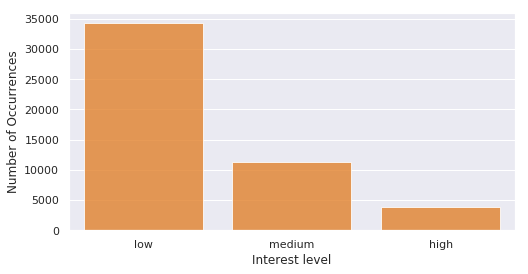

In [16]:
int_level = interests['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

## Bathrooms

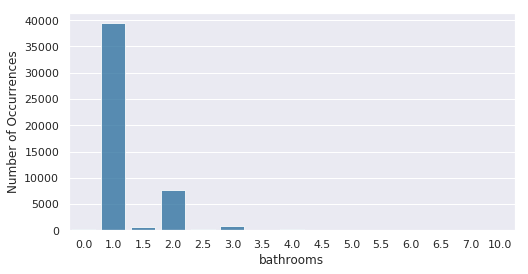

In [17]:
cnt_srs = interests['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

## Bedrooms

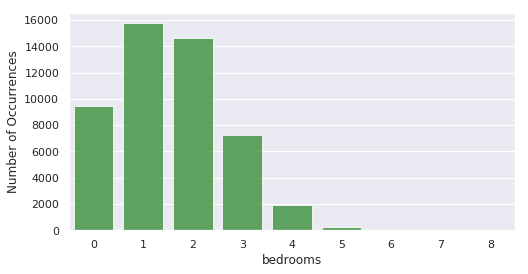

In [18]:
cnt_srs = interests['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


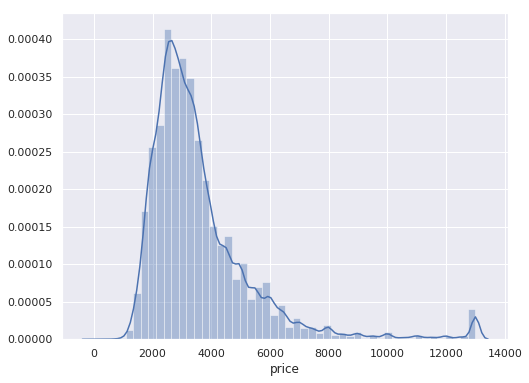

In [19]:
ulimit = np.percentile(interests.price.values, 99)
interests['price'].ix[interests['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(interests.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

We have a right skewed distribuition

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


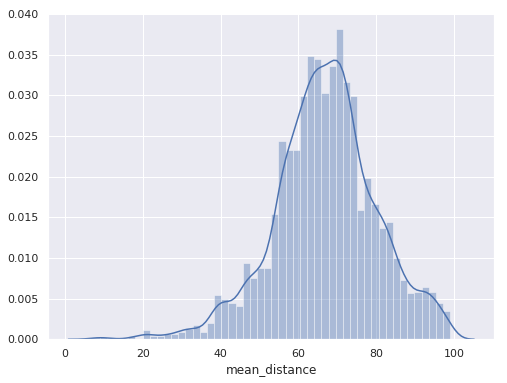

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(foursquare.mean_distance.values, bins=50, kde=True)
plt.xlabel('mean_distance', fontsize=12)
plt.show()

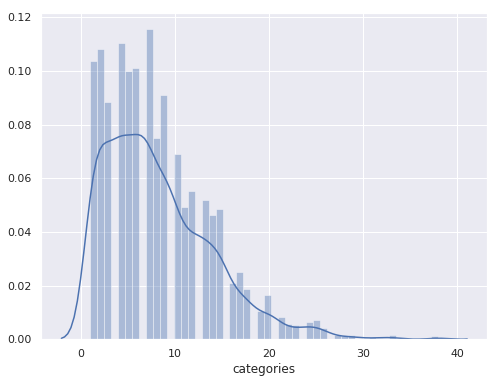

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(foursquare.categories.values, bins=50, kde=True)
plt.xlabel('categories', fontsize=12)
plt.show()

# Feature Enineering

In [22]:
features_to_use  = ["bathrooms", "bedrooms", "latitude", "longitude", "price"]

In [23]:
# count of photos #
interests["num_photos"] = interests["photos"].apply(len)

# count of "features" #
interests["num_features"] = interests["features"].apply(len)

# count of words present in description column #
interests["num_description_words"] = interests["description"].apply(lambda x: len(x.split(" ")))

# convert the created column to datetime object so as to extract more features 
interests["created"] = pd.to_datetime(interests["created"])

# Let us extract some features like year, month, day, hour from date columns #
interests["created_year"] = interests["created"].dt.year
interests["created_month"] = interests["created"].dt.month
interests["created_day"] = interests["created"].dt.day
interests["created_hour"] = interests["created"].dt.hour

# adding all these new features to use list #
features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year", "created_month", "created_day", "listing_id", "created_hour"])rain_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

# adding all these new features to use list #
features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year", "created_month", "created_day", "listing_id", "created_hour"])

SyntaxError: invalid syntax (<ipython-input-23-1f0c0f7e3855>, line 20)